# Математика
## СЛАУ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

Рассмотрим систему из 3 линейных уравнений с 2 неизвестными:

$\left\{\begin{matrix}
w_{11}x+w_{12}y = w_{10} \\ 
w_{21}x+w_{22}y = w_{20}\\ 
w_{31}x+w_{32}y = w_{30}
\end{matrix}\right.$

Воспользуемся матричной записью:

$A = \begin{pmatrix}
w_{11} & w_{12}\\ 
w_{21} & w_{22}\\ 
w_{31} & w_{22}
\end{pmatrix}
$
,
$
B = \begin{pmatrix}
w_{10}\\ 
w_{20}\\ 
w_{30}
\end{pmatrix}
$

, где A - матрица коэффициентов перед неизвестными, B - вектор свободных членов

Для построения графика функции можно выразить $y(x)$ для i-ого уравнения:

$y(x) = \frac{w_{i0} - w_{i1}x}{w_{i2}}$

In [2]:
def y(x, w0, w1, w2):
    return (w0 - x*w1) / w2

In [3]:
A = np.array([[1, -1],[3, 1],[1, 1]])
B = np.array([-1, 9, 2])

print "A:\n", A
print "B:\n", B

A:
[[ 1 -1]
 [ 3  1]
 [ 1  1]]
B:
[-1  9  2]


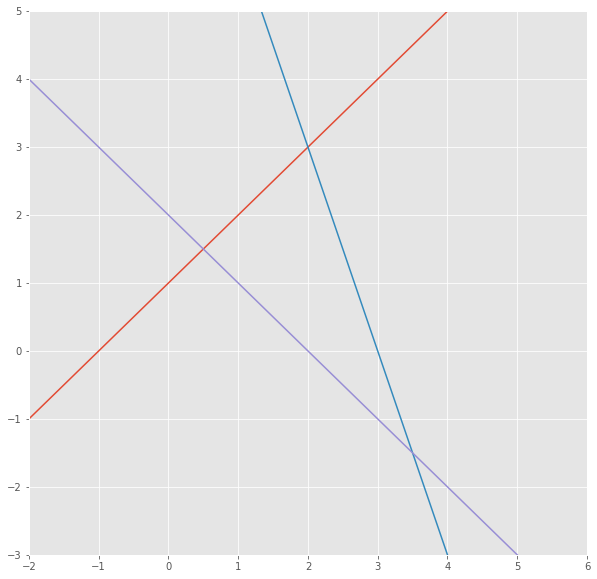

In [4]:
fig, ax = plt.subplots(figsize=(10,10)) # Создаём поле графика увеличенного размера

plt.xlim((-2.0, 6.0)) # ограничение для оси x
plt.ylim((-3.0, 5.0)) # ограничение для оси y
x = np.linspace(-2, 6, 100) # Сгенерируем Numpy массив из 100 точек (аргументов, x) в интервале от -1 до 5.

ax.plot(x, y(x, B[0], A[0][0], A[0][1])) # прямая, коэффициенты a,b соответсвуют 0 строке матрицы
ax.plot(x, y(x, B[1], A[1][0], A[1][1])) # прямая, коэффициенты a,b соответсвуют 1 строке матрицы
ax.plot(x, y(x, B[2], A[2][0], A[2][1])) # прямая, коэффициенты a,b соответсвуют 2 строке матрицы
plt.show() # Покажем результат построений

*Система не будет иметь решений*

A:
[[ 1 -1]
 [ 3  1]
 [ 0  1]]
B:
[-1  9  3]


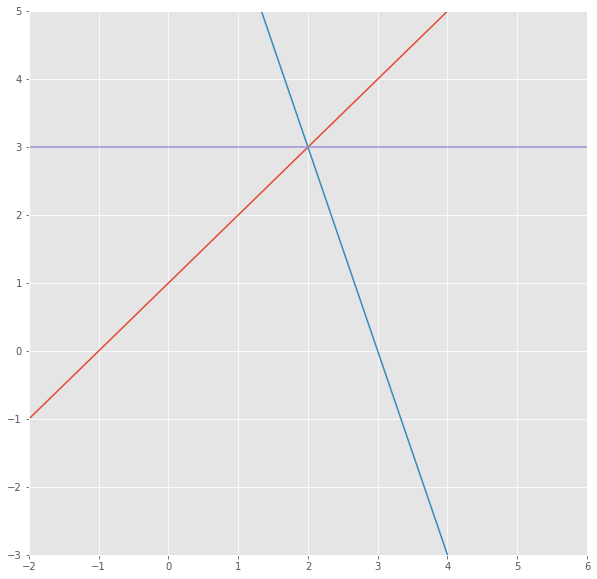

In [6]:
A = np.array([[1, -1],[3, 1],[0, 1]])
B = np.array([-1, 9, 3])

print "A:\n", A
print "B:\n", B

fig, ax = plt.subplots(figsize=(10,10)) # Создаём поле графика увеличенного размера

plt.xlim((-2.0, 6.0)) # ограничение для оси x
plt.ylim((-3.0, 5.0)) # ограничение для оси y
x = np.linspace(-2, 6, 100) # Сгенерируем Numpy массив из 100 точек (аргументов, x) в интервале от -1 до 5.

ax.plot(x, y(x, B[0], A[0][0], A[0][1])) # прямая, коэффициенты a,b соответсвуют 0 строке матрицы
ax.plot(x, y(x, B[1], A[1][0], A[1][1])) # прямая, коэффициенты a,b соответсвуют 1 строке матрицы
ax.plot(x, y(x, B[2], A[2][0], A[2][1])) # прямая, коэффициенты a,b соответсвуют 2 строке матрицы
plt.show() # Покажем результат построений

Т.е. можно заметить, что система:

$\left\{\begin{matrix}
1x-1y = -1 \\ 
3x+1y = 9\\ 
0x+1y = 3
\end{matrix}\right.$

Имеет решение. И ровно 1 решение (2, 3)

Однако, данная система **не может быть решена матричным методом**:

In [7]:
print "A:\n", A
print "B:\n", B

from scipy.linalg import solve
solve(A, B)

A:
[[ 1 -1]
 [ 3  1]
 [ 0  1]]
B:
[-1  9  3]


ValueError: Input a needs to be a square matrix.

Для использования матричного метода необходима **квадратная** матрица A.

In [8]:
m = np.insert(A, 2, B, axis=1)
m

array([[ 1, -1, -1],
       [ 3,  1,  9],
       [ 0,  1,  3]])

In [9]:
np.linalg.matrix_rank(m)

2

In [10]:
-3*m[0] + 1*m[1]

array([ 0,  4, 12])

In [11]:
-3*m[0] + 1*m[1] -4*m[2] == 0

array([ True,  True,  True], dtype=bool)

*Очевидно, что система из m уравнений с n неизвестными (m>n) может иметь 1 решение только если m-n уравнений можно выразить через остальные*

Возьмём только 2 первых уравнения системы и соответсвующие им матрицу и вектор свободных членов:

In [12]:
print "Matrix:\n", m[:2,:2] # Срез по строкам с 0 по 2 и по столбцам с 0 по 2 индексы (не включая 2)
print "Vector:\n", m[:2,2] # Срез по строкам с 0 по 2 и для 2 столбца (т.е. 1 и 2 строка, 1 столбца)

Matrix:
[[ 1 -1]
 [ 3  1]]
Vector:
[-1  9]


In [13]:
solve(m[:2,:2], m[:2,2])

array([ 2.,  3.])